In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [86]:
data = pd.read_csv('datasets/diamonds.csv', index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [87]:
data.shape

(53940, 10)

In [88]:
data.reset_index(inplace=True, drop=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [89]:
cor = data.corr()
cor

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [90]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [91]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [92]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

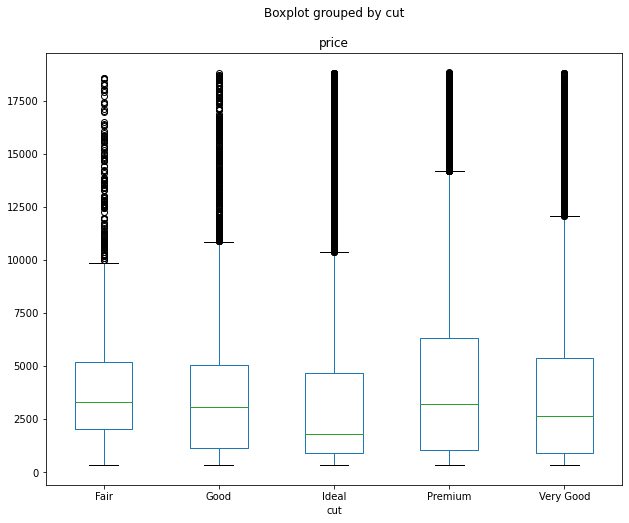

In [93]:
data.boxplot(by='cut', column=['price'], grid=False, figsize=(10,8))

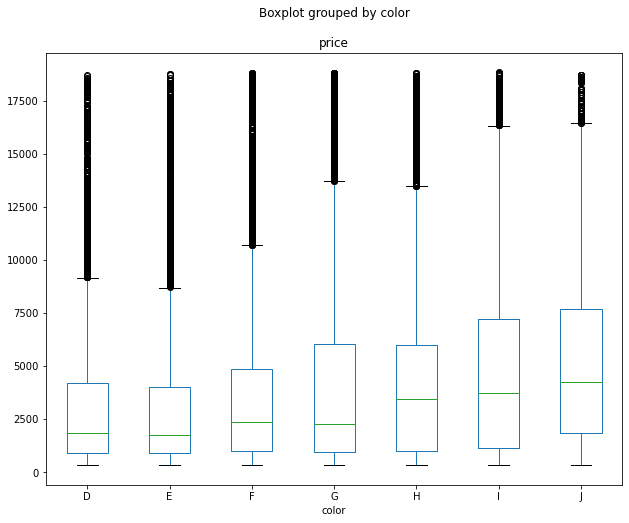

In [94]:
data.boxplot(by='color', column=['price'], grid=False, figsize=(10,8))

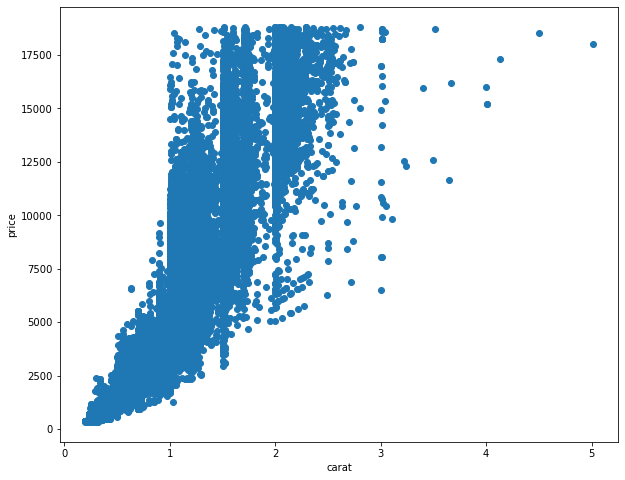

In [95]:
plt.subplots(figsize=(10,8))
plt.scatter(data['carat'], data['price'])

plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [96]:
clarity_dict = {"IF": 7, "VVS1": 6, "VVS2": 5, "VS1": 4, "VS2": 3, "SI1": 2, "SI2": 1, "I1": 0}
data['clarity'].replace(clarity_dict, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75


In [97]:
data = pd.get_dummies(data, columns=['cut', 'color'])
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1


In [98]:
NUMERIC_FEATURES = ['carat', 'depth', 'x', 'y', 'z']
numeric_df = data[NUMERIC_FEATURES]
numeric_df.describe()

,carat,depth,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,5.731157,5.734526,3.538734
std,0.474011,1.432621,1.121761,1.142135,0.705699
min,0.200000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,6.540000,6.540000,4.040000
max,5.010000,79.000000,10.740000,58.900000,31.800000


In [99]:
from sklearn.preprocessing import scale
numeric_array = scale(numeric_df)
numeric_array[:5]

array([[-1.19816781, -0.17409151, -1.58783745, -1.53619556, -1.57112919],
       [-1.24036129, -1.36073849, -1.64132529, -1.65877419, -1.74117497],
       [-1.19816781, -3.38501862, -1.49869105, -1.45739502, -1.74117497],
       [-1.07158736,  0.45413336, -1.36497146, -1.31730516, -1.28771955],
       [-1.02939387,  1.08235823, -1.24016651, -1.21223777, -1.11767377]])

In [100]:
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)
numeric_df.describe()

,carat,depth,x,y,z
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.889982e-14,-3.658830e-15,1.034809e-14,-3.139766e-15,-7.314273e-15
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-1.308760e+01,-5.109120e+00,-5.020931e+00,-5.014556e+00
25%,-8.395232e-01,-5.231053e-01,-9.103248e-01,-8.882800e-01,-8.909461e-01
50%,-2.066210e-01,3.531678e-02,-2.777553e-02,-2.147398e-02,-1.237618e-02
75%,5.106683e-01,5.239361e-01,7.210542e-01,7.052421e-01,7.103184e-01
max,8.886075e+00,1.204139e+01,4.465203e+00,4.654965e+01,4.004758e+01


In [101]:
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,1,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,1,0,0,0,0,0
1,0.21,2,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,1,0,0,0,0,0
2,0.23,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,1,0,0,0,0,0
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0,0,0,0,0,0,1,0
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,0,0,0,1


In [102]:
data.drop(NUMERIC_FEATURES, inplace=True, axis=1)
data.head()

,clarity,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1,55.0,326,0,0,1,0,0,0,1,0,0,0,0,0
1,2,61.0,326,0,0,0,1,0,0,1,0,0,0,0,0
2,4,65.0,327,0,1,0,0,0,0,1,0,0,0,0,0
3,3,58.0,334,0,0,0,1,0,0,0,0,0,0,1,0
4,1,58.0,335,0,1,0,0,0,0,0,0,0,0,0,1


In [103]:
data = pd.concat([data, numeric_df], axis=1)
data.shape

(53940, 20)

In [104]:
data.head(10)

,clarity,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,x,y,z
0,1,55.0,326,0,0,1,0,0,0,1,0,0,0,0,0,-1.198168,-0.174092,-1.587837,-1.536196,-1.571129
1,2,61.0,326,0,0,0,1,0,0,1,0,0,0,0,0,-1.240361,-1.360738,-1.641325,-1.658774,-1.741175
2,4,65.0,327,0,1,0,0,0,0,1,0,0,0,0,0,-1.198168,-3.385019,-1.498691,-1.457395,-1.741175
3,3,58.0,334,0,0,0,1,0,0,0,0,0,0,1,0,-1.071587,0.454133,-1.364971,-1.317305,-1.287720
4,1,58.0,335,0,1,0,0,0,0,0,0,0,0,0,1,-1.029394,1.082358,-1.240167,-1.212238,-1.117674
5,5,57.0,336,0,0,0,0,1,0,0,0,0,0,0,1,-1.177071,0.733344,-1.596752,-1.553707,-1.500277
6,6,57.0,336,0,0,0,0,1,0,0,0,0,0,1,0,-1.177071,0.384331,-1.587837,-1.536196,-1.514447
7,2,55.0,337,0,0,0,0,1,0,0,0,0,1,0,0,-1.134878,0.105120,-1.480862,-1.422373,-1.429424
8,3,61.0,337,1,0,0,0,0,0,1,0,0,0,0,0,-1.219265,2.338808,-1.659155,-1.711308,-1.486106
9,4,61.0,338,0,0,0,0,1,0,0,0,0,1,0,0,-1.198168,-1.639950,-1.543264,-1.474906,-1.627811


In [105]:
data.to_csv('datasets/diamonds_processed.csv', index=False)

In [106]:
!ls datasets/

bbc-text.csv	 diamonds.csv		   german_credit_data_dataset.csv
boston_data.csv  diamonds_processed.csv    Mall_Customers.csv
cars.csv	 gender_voice_dataset.csv  wine.csv


In [107]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [108]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
y_prediction = linear_regression.predict(x_test)
y_prediction

array([5192.70093405, 7360.37416323, 5987.40487298, ..., 5571.1626533 ,
       7368.89858148, 2343.51625881])

In [111]:
train_score = linear_regression.score(x_train, y_train)
print(train_score)

0.9099057566776174


In [112]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_prediction)
print(score)

0.912612112963329
